<center> Materia: Aprendizaje profundo para percepción y control </center>
<center> Laboratorio: Conceptos generales de las redes neuronales artificiales (ANN) </center>
<center> Jesús Eduardo Sanchez Daza </center>
<center> Maestria en Inteligencia Artificial Aplicada al Sector Energetico </center>

In [20]:
# Importamos las librerias necesarias
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
from keras.callbacks import EarlyStopping

In [2]:
# Importamos el dataset correspondiente y partimos el dataset en datos de entrenamiento y datos de testeo
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#### Apartado 1 - Información del dataset

In [3]:
# Dimensiones del dataset
print('Train: X = ', X_train_full.shape)
print('Test: X = ', X_test.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


##### Podemos ver que para los datos de Entrenamiento existen 60.000 imagenes y para los de Test 10.000 imagenes y cada una de estas con un tamaño de 28*28 pixeles en ancho y largo

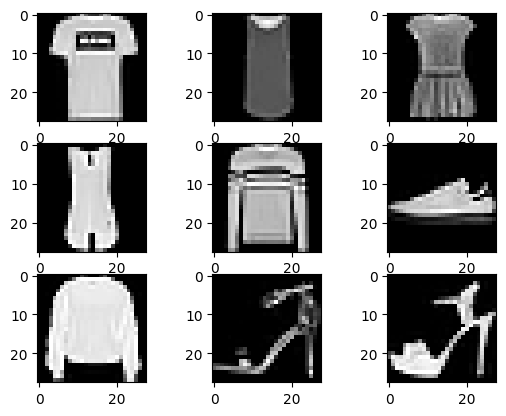

In [4]:
for i in range(1, 10):
   
    # Creamos una red 3*3 para visualizar 9 imagenes
    # Las imagenes son representadas por pixeles, cada pixel tiene asignado un color entre 0 - 255 y es leido como un array de numpy con tamaño (Alto, Ancho, 3)
    plt.subplot(3, 3, i)
     
    # Insertamos cada imagen como un array de numpy que cada pixel representa una escala de color
    plt.imshow(X_train_full[i], cmap=plt.get_cmap('gray'))
 
plt.show()

#### Apartado 2 - Creación y evaluación del modelo

In [4]:
# Escalamos los datos de las imágenes - De escala RGB (0 - 255) a escala 0 - 1 (esta es una capa para añadir al modelo final)
# Tomamos 5000 imagenes para validacion y el resto para el entrenamiento
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# Creamos el modelo base con 3 capas
# 1 Capa input, que debe tener el mismo tamaño de las imagenes (28*28)
# 1 Capas hidden, para la extracción de caracteristicas
# 1 Capa output de tipo Softmax para encontrar una probabilidad de que esa prenda pertenezca a X clase, ademas de 10 neuronas por haber 10 clases distintas
base_model = keras.models.Sequential()
base_model.add(keras.layers.Flatten(input_shape=[28,28]))
base_model.add(keras.layers.Dense(100, activation="relu"))
base_model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
# Miramos el resumen del modelo
# Aqui podemos encontrar el tipo y numero de capas, su tamaño y el numero de parametros que tienen
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compilamos el modelo
base_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer= "sgd",
                   metrics =["accuracy"])

In [9]:
history = base_model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7742 - accuracy: 0.7462 - val_loss: 0.5566 - val_accuracy: 0.8210
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5303 - accuracy: 0.8201 - val_loss: 0.4978 - val_accuracy: 0.8334
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4816 - accuracy: 0.8341 - val_loss: 0.4693 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.4571 - val_accuracy: 0.8498
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4372 - accuracy: 0.8475 - val_loss: 0.4276 - val_accuracy: 0.8562
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4235 - accuracy: 0.8526 - val_loss: 0.4143 - val_accuracy: 0.8590
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4116 - accuracy: 0.8565 - val_loss: 0.4013 - val_accuracy:

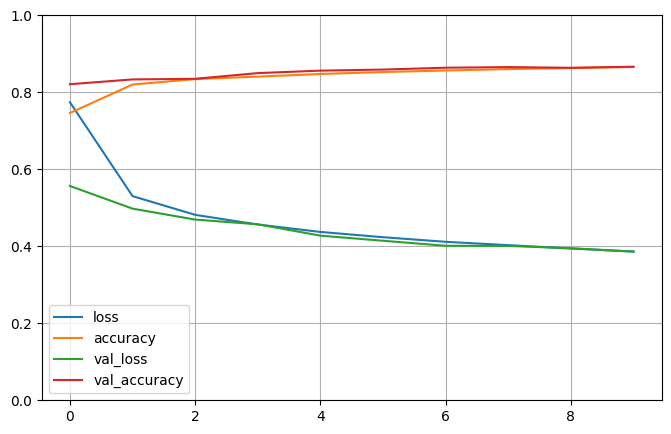

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

##### Según la grafica, podemos darnos cuenta que el rendimiento del modelo sí va mejorando en función de las epocas del modelo, podemos ver que existe una reducción de alrededor del 50% (de 8 a 4) en la metrica de loss, el cual es una metrica importante que usamos para evaluar el modelo. Ademas, podemos ver que hay una mejoría de casi un 8% en la precisión del modelo a lo largo de las epocas

In [13]:
# Etiquetas de las clases del dataset
labels = ['t_shirt', 'trouser', 'pullover',
          'dress', 'coat', 'sandal', 'shirt',
          'sneaker', 'bag', 'ankle_boots']

In [11]:
accuracy = round(np.average(history.history['val_accuracy']),2)
print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

La precisión promedio del modelo es de 85.0 %


#### Apartado 3 - Predicción de la red neuronal

1/1 [==============================] - 0s 32ms/step
ankle_boots


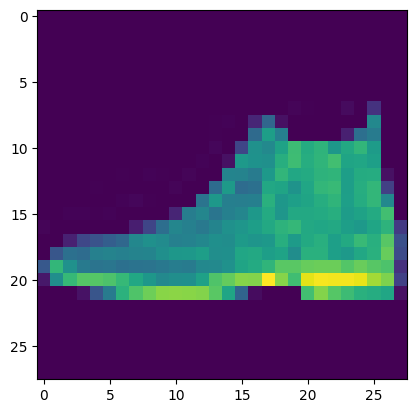

1/1 [==============================] - 0s 40ms/step
pullover


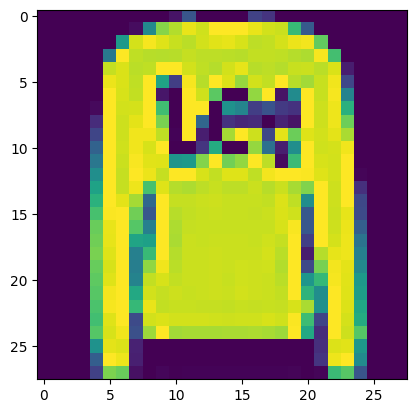

1/1 [==============================] - 0s 32ms/step
trouser


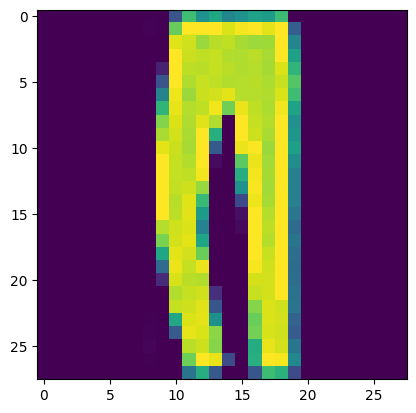

1/1 [==============================] - 0s 33ms/step
trouser


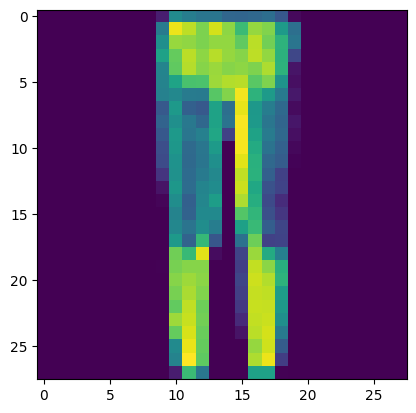

1/1 [==============================] - 0s 58ms/step
shirt


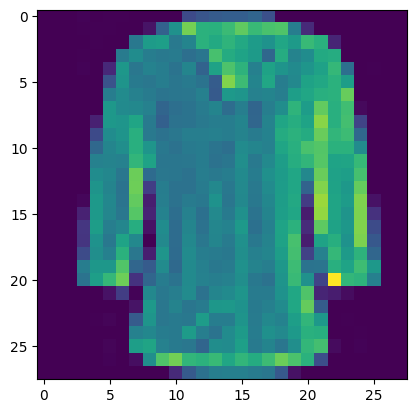

In [14]:
# Hacemos y visualizamos distintas predicciones
for i in range(1, 6):
    predictions = base_model.predict(X_test[:i])
    label = labels[np.argmax(predictions[i-1])]    
    print(label)
    plt.imshow(X_test[:i][i-1])
    plt.show()

In [15]:
# Se procede a crear una función que ayude a evaluar cada uno de los cambios que se haga al modelo base
def evaluate_model(model):
    history = model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    accuracy = round(np.average(history.history['val_accuracy']),2)
    print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

#### Apartado 4 - Variación de las capas intermedias

In [16]:
# Variamos el modelo 1. Reducimos en 50 el numero de neuronas
model_hidden_layers = keras.models.Sequential()
model_hidden_layers.add(keras.layers.Flatten(input_shape=[28,28]))
model_hidden_layers.add(keras.layers.Dense(50, activation="relu"))
model_hidden_layers.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_hidden_layers.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

In [17]:
model_hidden_layers.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8209 - accuracy: 0.7337 - val_loss: 0.5717 - val_accuracy: 0.8124
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5418 - accuracy: 0.8165 - val_loss: 0.4980 - val_accuracy: 0.8336
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4898 - accuracy: 0.8318 - val_loss: 0.4709 - val_accuracy: 0.8416
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4643 - accuracy: 0.8392 - val_loss: 0.4394 - val_accuracy: 0.8530
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8449 - val_loss: 0.4375 - val_accuracy: 0.8478
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4325 - accuracy: 0.8489 - val_loss: 0.4314 - val_accuracy: 0.8528
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4223 - accuracy: 0.8544 - val_loss: 0.4187 - val_accuracy:

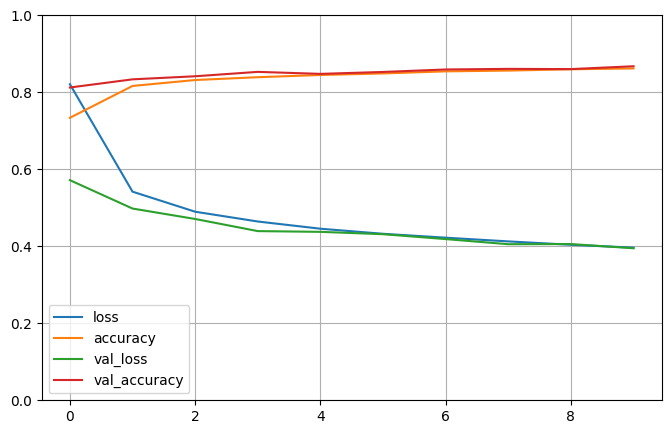

La precisión promedio del modelo es de 85.0 %


In [18]:
evaluate_model(model_hidden_layers)

In [19]:
# Variamos el modelo 1. Aumentamos en 50 el numero de capas
model_hidden_layers = keras.models.Sequential()
model_hidden_layers.add(keras.layers.Flatten(input_shape=[28,28]))
model_hidden_layers.add(keras.layers.Dense(150, activation="relu"))
model_hidden_layers.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_hidden_layers.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7332 - accuracy: 0.7631 - val_loss: 0.5369 - val_accuracy: 0.8252
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5169 - accuracy: 0.8252 - val_loss: 0.4757 - val_accuracy: 0.8446
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4736 - accuracy: 0.8376 - val_loss: 0.4511 - val_accuracy: 0.8494
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4492 - accuracy: 0.8467 - val_loss: 0.4331 - val_accuracy: 0.8548
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4311 - accuracy: 0.8511 - val_loss: 0.4249 - val_accuracy: 0.8566
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4165 - accuracy: 0.8555 - val_loss: 0.4105 - val_accuracy: 0.8610
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4041 - accuracy: 0.8598 - val_loss: 0.3968 - val_accuracy

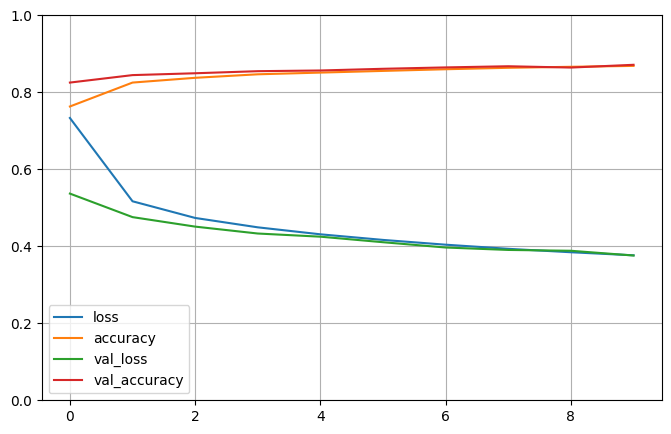

La precisión promedio del modelo es de 86.0 %


In [20]:
evaluate_model(model_hidden_layers)

##### Como se puede ver, no existe una mejoria significativa al intentar aumentar o disminuir el numero de neuronas en la capa intermedia cuando lo comparamos con el modelo base, en este caso, esto se puede deber a la baja complejidad del problema, ya que el numero de caracteristicas a extraer de las imagenes y el numero de pixeles no justifica un aumento en la complejidad (neuronas)

#### Apartado 5 - Capa Flatten

In [21]:
# Variamos el modelo 1. Añadimos otra capa flatten
model_flatt_layer = keras.models.Sequential()
model_flatt_layer.add(keras.layers.Flatten(input_shape=[28,28]))
model_flatt_layer.add(keras.layers.Flatten())
model_flatt_layer.add(keras.layers.Dense(50, activation="relu"))
model_flatt_layer.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_flatt_layer.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7984 - accuracy: 0.7412 - val_loss: 0.5704 - val_accuracy: 0.8128
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5402 - accuracy: 0.8159 - val_loss: 0.5045 - val_accuracy: 0.8280
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8307 - val_loss: 0.4752 - val_accuracy: 0.8410
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4646 - accuracy: 0.8398 - val_loss: 0.4442 - val_accuracy: 0.8510
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4468 - accuracy: 0.8450 - val_loss: 0.4292 - val_accuracy: 0.8602
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4326 - accuracy: 0.8494 - val_loss: 0.4206 - val_accuracy: 0.8568
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4220 - accuracy: 0.8545 - val_loss: 0.4128 - val_accuracy:

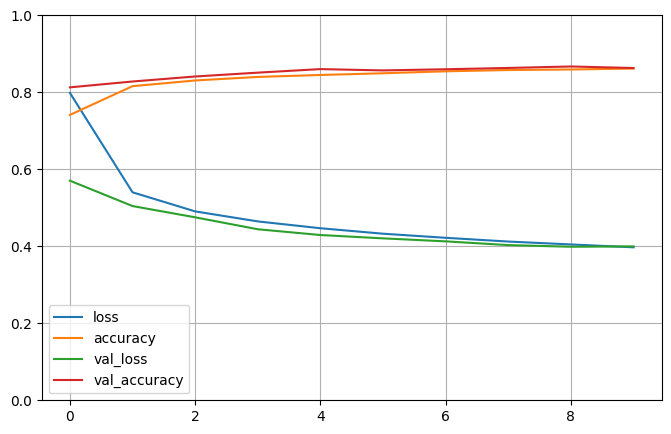

La precisión promedio del modelo es de 85.0 %


In [22]:
evaluate_model(model_flatt_layer)

##### Teniendo en cuenta que la capa flatten transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Esta capa no tiene parametros que aprender; solo reformatea el set de datos, por lo que no va a ver un cambio en las metricas del entrenamiento o de prediccion si añadimos una o mas capas de este tipo. Pero, teniendo en cuenta su función y que este es un problema de reconocimiento de imagenes, necesitamos este capa siempre al principio de la red, así las capas intermedias podrán extraer las caracteristicas

#### Apartado 6 - Número de neuronas en la capa de salida

In [24]:
# Variamos el modelo 1. Variamos las neuronas en la capa de salida
model_output_layer = keras.models.Sequential()
model_output_layer.add(keras.layers.Flatten(input_shape=[28,28]))
model_output_layer.add(keras.layers.Dense(50, activation="relu"))
model_output_layer.add(keras.layers.Dense(20, activation="softmax"))

# Compilamos el modelo
model_output_layer.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8452 - accuracy: 0.7306 - val_loss: 0.5808 - val_accuracy: 0.8046
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5452 - accuracy: 0.8139 - val_loss: 0.5373 - val_accuracy: 0.8038
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4944 - accuracy: 0.8305 - val_loss: 0.4854 - val_accuracy: 0.8258
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4666 - accuracy: 0.8390 - val_loss: 0.4531 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4478 - accuracy: 0.8440 - val_loss: 0.4388 - val_accuracy: 0.8516
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4335 - accuracy: 0.8493 - val_loss: 0.4221 - val_accuracy: 0.8580
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4211 - accuracy: 0.8523 - val_loss: 0.4239 - val_accuracy:

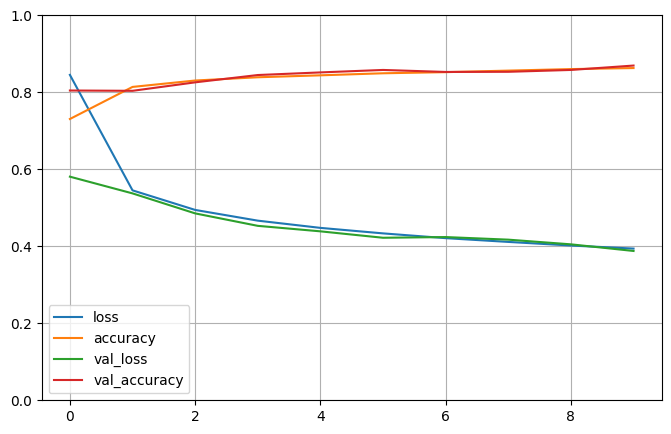

La precisión promedio del modelo es de 84.0 %


In [25]:
evaluate_model(model_output_layer)

##### Cuando tenemos un problema de clasificacion multiclase, el número de neuronas en la capa de salida debe coincidir con el número de clases que tienen las imagenes, en caso de tener mas que el número distinto de clases, la red neuronal seguirá funcionando, pero las neuronas adicionales no tendrán ningún efecto útil en la precisión del modelo. Para este ejemplo, las primeras 10 neuronas en la capa de salida serán las que representan las 10 clases diferentes que estamos tratando de predecir, mientras que las otras neuronas simplemente permanecerán inactivas y no contribuirán en nada al proceso de clasificación, además de que pueden generar complejidad innecesaria al modelo

##### Cuando decidimos colocar un número menor que el número de clases, tendremos un error y Tensorflow lanzará un error, ya que la salida de la red neuronal para un problema de clasificación multiclase debe ser una distribución de probabilidad sobre las posibles clases, y cada neurona en la capa de salida corresponde a una de las clases posibles. Si la capa de salida tiene menos neuronas que el número de clases, entonces la red no sería capaz de producir una distribución de probabilidad completa y precisa para todas las clases.

#### Apartado 7 - Aumento del Epoch

In [26]:
model_epoch = keras.models.Sequential()
model_epoch.add(keras.layers.Flatten(input_shape=[28,28]))
model_epoch.add(keras.layers.Dense(50, activation="relu"))
model_epoch.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_epoch.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8530 - accuracy: 0.7199 - val_loss: 0.5836 - val_accuracy: 0.8020
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5472 - accuracy: 0.8150 - val_loss: 0.5058 - val_accuracy: 0.8326
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4912 - accuracy: 0.8306 - val_loss: 0.4603 - val_accuracy: 0.8484
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4632 - accuracy: 0.8385 - val_loss: 0.4415 - val_accuracy: 0.8520
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4437 - accuracy: 0.8462 - val_loss: 0.4269 - val_accuracy: 0.8562
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4294 - accuracy: 0.8499 - val_loss: 0.4296 - val_accuracy: 0.8578
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4183 - accuracy: 0.8533 - val_loss: 0.4111 - val_accuracy:

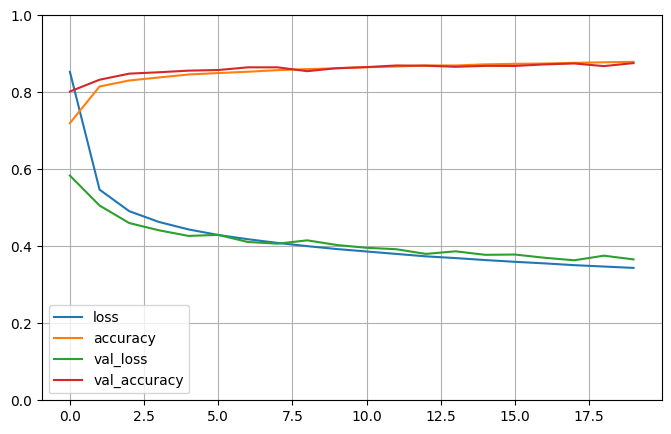

La precisión promedio del modelo es de 86.0 %


In [27]:
# Duplicamos el número de epocas del modelo
history = model_epoch.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
accuracy = round(np.average(history.history['val_accuracy']),2)
print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

##### En este caso en concreto, podemos ver que un aumento en el número de epocas no significó una mejoria o empeoramiento en el performance del modelo, esto se puede explicar ya que es posible que hubieramos llegado a un punto de convergencia en el que el modelo ya ha aprendido todo lo que puede aprender de los datos de entrenamiento. Esto significa que, a medida que el modelo continúa entrenando, no está aprendiendo nada nuevo y, por lo tanto, la precisión se mantiene constante.

#### Apartado 8 - Early Stop

In [28]:
model_early_stop = keras.models.Sequential()
model_early_stop.add(keras.layers.Flatten(input_shape=[28,28]))
model_early_stop.add(keras.layers.Dense(50, activation="relu"))
model_early_stop.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_early_stop.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7929 - accuracy: 0.7470 - val_loss: 0.5693 - val_accuracy: 0.8108
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5367 - accuracy: 0.8174 - val_loss: 0.5019 - val_accuracy: 0.8298
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4891 - accuracy: 0.8307 - val_loss: 0.4667 - val_accuracy: 0.8436
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4637 - accuracy: 0.8400 - val_loss: 0.4664 - val_accuracy: 0.8422
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4472 - accuracy: 0.8451 - val_loss: 0.4318 - val_accuracy: 0.8540
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4355 - accuracy: 0.8490 - val_loss: 0.4524 - val_accuracy: 0.8436
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4245 - accuracy: 0.8521 - val_loss: 0.4178 - val_ac

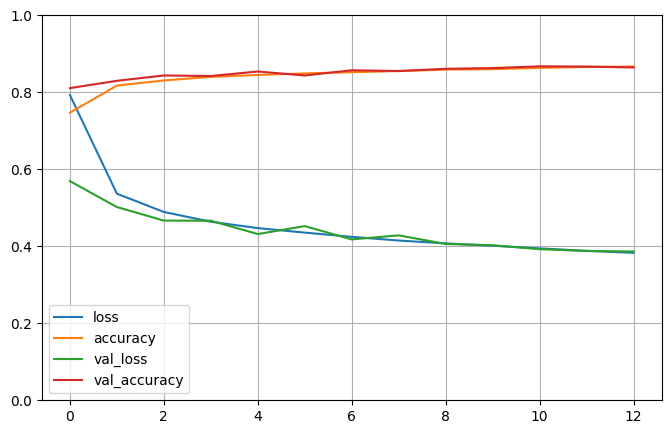

La precisión promedio del modelo es de 85.0 %


In [29]:
# Agregamos Early Stopping
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
history = model_early_stop.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
accuracy = round(np.average(history.history['val_accuracy']),2)
print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

##### Para este caso, se utilizó la tecnica de EarlyStopping, el cual se define como detener el entrenamiento cuando una métrica supervisada haya dejado de mejorar, la metrica escogida para monitorear es la precision en los datos de test, ademas de que se añadió el parametro Patience = 2, el cual se define como el número de épocas sin mejora tras las cuales se detendrá el entrenamiento.

##### Por lo que podemos inferir que para la epoca 13 el modelo deja de mejorar en función del porcentaje de precisión con el conjunto de validación

#### Apartado 9 - Unidades de Activación

In [31]:
def change_activation(name):
    print(" ")
    print(f"Evaluamos con la funcion de activación {name}")
    model_change_activacion = keras.models.Sequential()
    model_change_activacion.add(keras.layers.Flatten(input_shape=[28,28]))
    model_change_activacion.add(keras.layers.Dense(50, activation=name))
    model_change_activacion.add(keras.layers.Dense(10, activation="softmax"))

    # Compilamos el modelo
    model_change_activacion.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd",
                metrics =["accuracy"])

    es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
    history = model_change_activacion.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    accuracy = round(np.average(history.history['val_accuracy']),2)
    print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

 
Evaluamos con la funcion de activación sigmoid
Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4378 - accuracy: 0.6524 - val_loss: 0.9942 - val_accuracy: 0.7404
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8650 - accuracy: 0.7491 - val_loss: 0.7545 - val_accuracy: 0.7670
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7153 - accuracy: 0.7721 - val_loss: 0.6591 - val_accuracy: 0.7814
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6442 - accuracy: 0.7876 - val_loss: 0.6065 - val_accuracy: 0.8004
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5996 - accuracy: 0.7994 - val_loss: 0.5691 - val_accuracy: 0.8104
Epoch 6/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5677 - accuracy: 0.8064 - val_loss: 0.5429 - val_accuracy: 0.8162
Epoch 7/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.54

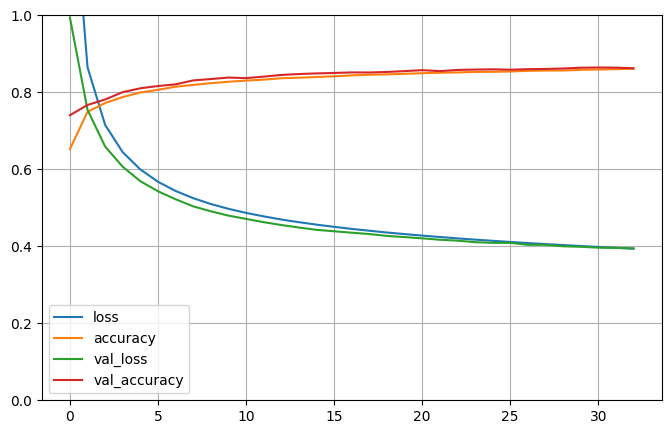

La precisión promedio del modelo es de 84.0 %
 
Evaluamos con la funcion de activación tanh
Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7708 - accuracy: 0.7526 - val_loss: 0.5549 - val_accuracy: 0.8142
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5281 - accuracy: 0.8187 - val_loss: 0.4821 - val_accuracy: 0.8340
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4783 - accuracy: 0.8328 - val_loss: 0.4492 - val_accuracy: 0.8448
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4505 - accuracy: 0.8413 - val_loss: 0.4286 - val_accuracy: 0.8528
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4317 - accuracy: 0.8473 - val_loss: 0.4177 - val_accuracy: 0.8556
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4175 - accuracy: 0.8526 - val_loss: 0.4087 - val_accuracy: 0.8592
Epoch 7/100
1719/1719 [===============

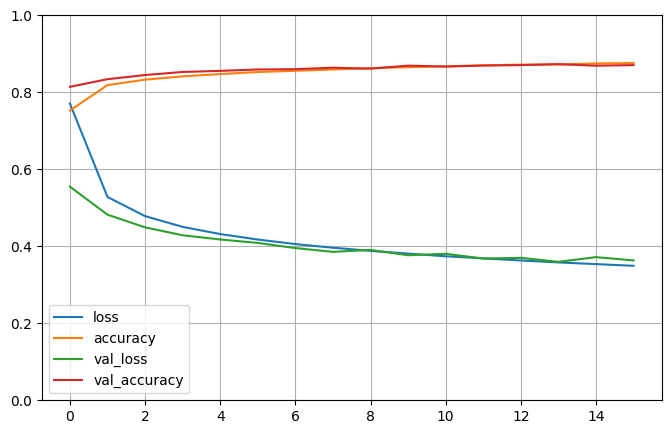

La precisión promedio del modelo es de 86.0 %


In [32]:
change_activation("sigmoid")
change_activation("tanh")

Para este caso, podemos darnos cuenta que la función de activación "tanh" o tangente hiperbolica tiene un poco mejor de rendimiento en comparación con la función softmax y la del modelo base "relu", esto se puede confirmar ya que utiliza menos epocas para llegar a un punto de convergencia y tiene una leve mejoria en cuanto accuracy y loss. Esto se puede explicar ya que la funcion tanh tiene la capacidad para evitar la saturación de gradiente en las capas intermedias

##### Apartado 10 - Inicialización de parámetros
- Para este apartado, vamos a explorar 3 opciones
1. Inicialización He: Esta tecnica ajusta la escala de los pesos según el número de entradas (o conexiones) que cada neurona tiene en la capa anterior
3. Inicialización Xavier: Es una técnica que ajusta los valores iniciales de los pesos para que las activaciones de las neuronas no sean ni demasiado grandes ni demasiado pequeñas (Extrae muestras de una distribución uniforme dentro de [-limit, limit], donde limit = sqrt(6 / (fan_in + fan_out)) (fan_in es el número de unidades de entrada en el tensor de pesos y fan_out es el número de unidades de salida))
4. Inicializacion Lecum: Con el mismo objetivo que la anterior con la diferencia de que extrae muestras de una distribución uniforme dentro de [-limit, limit], donde limit = sqrt(3 / fan_in).

In [6]:
def change_inicialization(name):
    print(" ")
    print(f"Evaluamos con la inicialización de parametros con la técnica {name}")
    model_change_init = keras.models.Sequential()
    model_change_init.add(keras.layers.Flatten(input_shape=[28,28]))
    model_change_init.add(keras.layers.Dense(50, activation="relu", kernel_initializer=name))
    model_change_init.add(keras.layers.Dense(10, activation="softmax"))

    # Compilamos el modelo
    model_change_init.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd",
                metrics =["accuracy"])

    es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
    history = model_change_init.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    accuracy = round(np.average(history.history['val_accuracy']),2)
    print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

 
Evaluamos con la inicialización de parametros con la técnica glorot_uniform
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8032 - accuracy: 0.7408 - val_loss: 0.5753 - val_accuracy: 0.8152
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5346 - accuracy: 0.8177 - val_loss: 0.4994 - val_accuracy: 0.8286
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4873 - accuracy: 0.8315 - val_loss: 0.4667 - val_accuracy: 0.8404
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4622 - accuracy: 0.8401 - val_loss: 0.4475 - val_accuracy: 0.8506
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4457 - accuracy: 0.8438 - val_loss: 0.4332 - val_accuracy: 0.8520
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4321 - accuracy: 0.8495 - val_loss: 0.4262 - val_accuracy: 0.8554
Epoch 7/100
1719/1719 [=============================

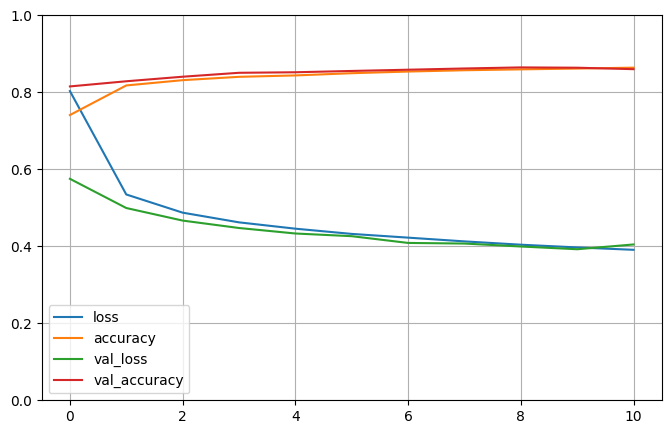

La precisión promedio del modelo es de 85.0 %
 
Evaluamos con la inicialización de parametros con la técnica lecun_uniform
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7800 - accuracy: 0.7500 - val_loss: 0.5507 - val_accuracy: 0.8226
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5238 - accuracy: 0.8214 - val_loss: 0.4778 - val_accuracy: 0.8374
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4764 - accuracy: 0.8355 - val_loss: 0.4650 - val_accuracy: 0.8428
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4507 - accuracy: 0.8440 - val_loss: 0.4343 - val_accuracy: 0.8530
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4334 - accuracy: 0.8498 - val_loss: 0.4204 - val_accuracy: 0.8586
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4201 - accuracy: 0.8539 - val_loss: 0.4218 - val_accuracy: 0.8548
Epoch 7

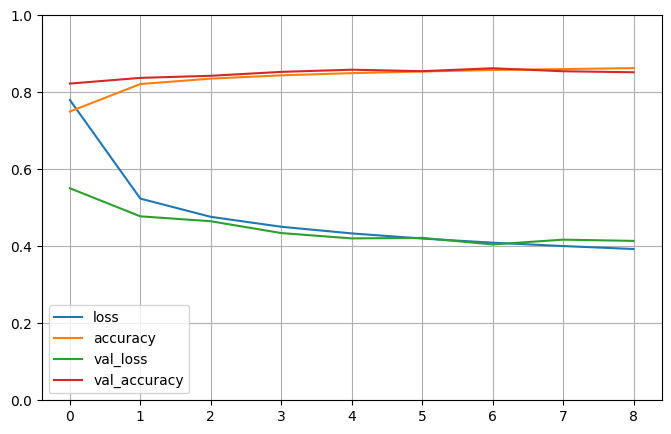

La precisión promedio del modelo es de 85.0 %
 
Evaluamos con la inicialización de parametros con la técnica he_uniform
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7915 - accuracy: 0.7403 - val_loss: 0.5651 - val_accuracy: 0.8168
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5346 - accuracy: 0.8187 - val_loss: 0.4918 - val_accuracy: 0.8392
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8320 - val_loss: 0.4630 - val_accuracy: 0.8456
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4585 - accuracy: 0.8412 - val_loss: 0.4499 - val_accuracy: 0.8496
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8476 - val_loss: 0.4353 - val_accuracy: 0.8550
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8524 - val_loss: 0.4263 - val_accuracy: 0.8558
Epoch 7/10

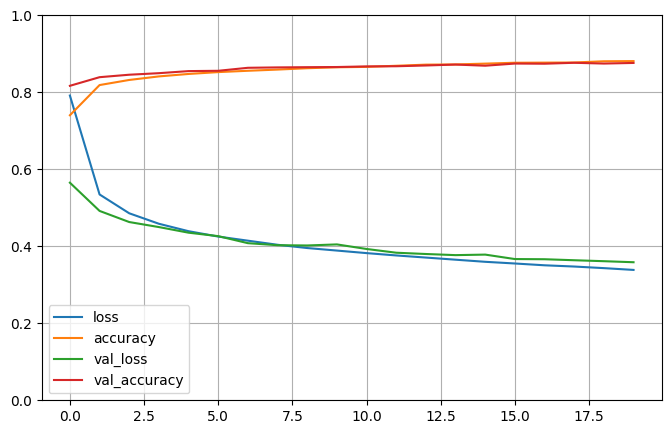

La precisión promedio del modelo es de 86.0 %


In [8]:
change_inicialization('glorot_uniform')
change_inicialization('lecun_uniform')
change_inicialization('he_uniform')

Para este caso, podemos ver que el inicializador con la tecnica Xavier fue el modelo que tuvo el menor tiempo para llegar a un punto de convergencia, sin embargo, tuvo un menor rendimiento que el resto de inicializadores, esto se puede deber a que, la inicialización de Lecun y la de He ajustan la escala de los pesos según el tamaño de la capa anterior y el tipo de función de activación. En el caso de la relu, la inicialización de He ajusta la escala para que la varianza de las activaciones sea constante en todas las capas, lo que ayuda a evitar la saturación de las neuronas y a mejorar el rendimiento del modelo. Teniendo en cuenta esto, el Inicializador con mejor relación costo y precision es el incializador He

##### Apartado 11 - Optimizadores
- Para este apartado, vamos a evaluar 5 optimizadores

1. Optimizador Adam: (Adaptive Moment Estimation) es un método de optimización estocástica que combina el descenso de gradiente estocástico con el promedio móvil exponencial de los gradientes de primer y segundo orden

2. Optimizador RMSProp: (Root Mean Square Propagation) es un método de optimización estocástica que utiliza una tasa de aprendizaje adaptativa por parámetro, utiliza el promedio móvil exponencial de los cuadrados de los gradientes para ajustar la tasa de aprendizaje de cada parámetro de forma individual

3. Optimizador Adagrad: (Adaptive Gradient Descent) es un método de optimización estocástica que ajusta la tasa de aprendizaje de cada parámetro en función de la magnitud de los gradientes previos de ese parámetro.

4. Optimizador Adadelta: extensión del optimizador Adagrad que busca mejorar su capacidad de adaptación a diferentes problemas. Adadelta utiliza un promedio móvil exponencial de los gradientes y de los cuadrados de los gradientes, pero en lugar de utilizar la tasa de aprendizaje, utiliza una escala de aprendizaje adaptativa que se actualiza en cada iteración.

5. Optimizador Nadam: (Nesterov-accelerated Adaptive Moment Estimation) es una variante del optimizador Adam que incorpora el algoritmo de Nesterov Momentum. El algoritmo de Nesterov Momentum utiliza una versión corregida del gradiente para actualizar los parámetros de la red neuronal. Nadam combina las ventajas de Adam y Nesterov Momentum

In [9]:
def change_optimizer(name):
    print(" ")
    print(f"Evaluamos con el optimizador {name}")
    model_change_opt = keras.models.Sequential()
    model_change_opt.add(keras.layers.Flatten(input_shape=[28,28]))
    model_change_opt.add(keras.layers.Dense(50, activation="relu"))
    model_change_opt.add(keras.layers.Dense(10, activation="softmax"))

    # Compilamos el modelo
    model_change_opt.compile(loss="sparse_categorical_crossentropy",
                optimizer= name,
                metrics =["accuracy"])

    es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
    history = model_change_opt.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    accuracy = round(np.average(history.history['val_accuracy']),2)
    print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

 
Evaluamos con el optimizador adam
Epoch 1/100
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5320 - accuracy: 0.8173 - val_loss: 0.4173 - val_accuracy: 0.8566
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4042 - accuracy: 0.8564 - val_loss: 0.3956 - val_accuracy: 0.8624
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3682 - accuracy: 0.8682 - val_loss: 0.3479 - val_accuracy: 0.8710
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8760 - val_loss: 0.3496 - val_accuracy: 0.8716
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3290 - accuracy: 0.8802 - val_loss: 0.3584 - val_accuracy: 0.8674
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3121 - accuracy: 0.8859 - val_loss: 0.3530 - val_accuracy: 0.8748
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy

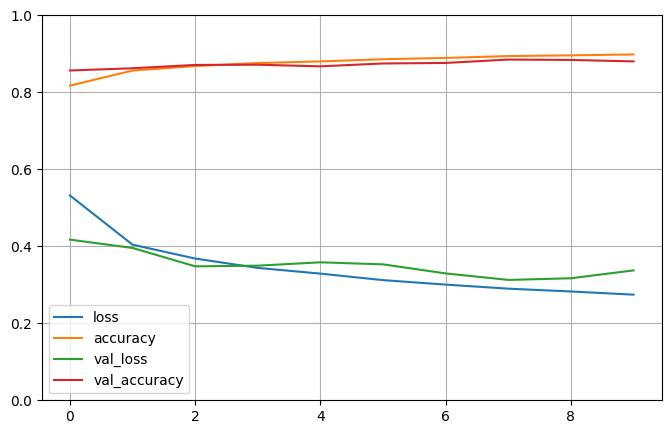

La precisión promedio del modelo es de 87.0 %
 
Evaluamos con el optimizador rmsprop
Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5387 - accuracy: 0.8117 - val_loss: 0.4567 - val_accuracy: 0.8408
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4004 - accuracy: 0.8579 - val_loss: 0.3819 - val_accuracy: 0.8660
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8708 - val_loss: 0.3559 - val_accuracy: 0.8742
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.8765 - val_loss: 0.3732 - val_accuracy: 0.8684
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8839 - val_loss: 0.3465 - val_accuracy: 0.8772
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3182 - accuracy: 0.8856 - val_loss: 0.3491 - val_accuracy: 0.8814
Epoch 7/100
1719/1719 [======================

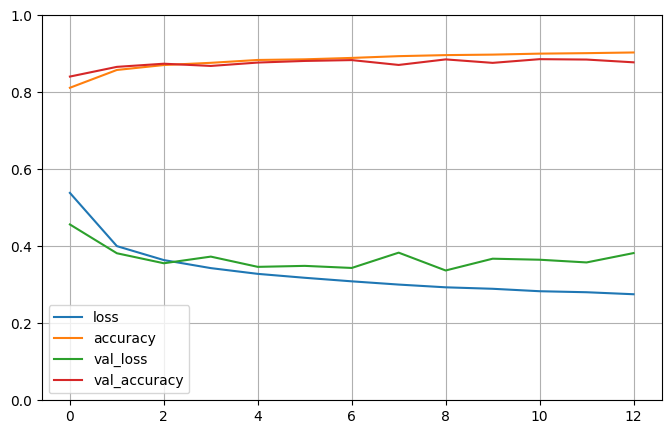

La precisión promedio del modelo es de 87.0 %
 
Evaluamos con el optimizador adagrad
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1630 - accuracy: 0.6491 - val_loss: 0.8502 - val_accuracy: 0.7374
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7879 - accuracy: 0.7501 - val_loss: 0.7238 - val_accuracy: 0.7754
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7030 - accuracy: 0.7773 - val_loss: 0.6669 - val_accuracy: 0.7922
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6581 - accuracy: 0.7917 - val_loss: 0.6329 - val_accuracy: 0.8012
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6291 - accuracy: 0.7986 - val_loss: 0.6087 - val_accuracy: 0.8094
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6082 - accuracy: 0.8044 - val_loss: 0.5911 - val_accuracy: 0.8120
Epoch 7/100
1719/1719 [======================

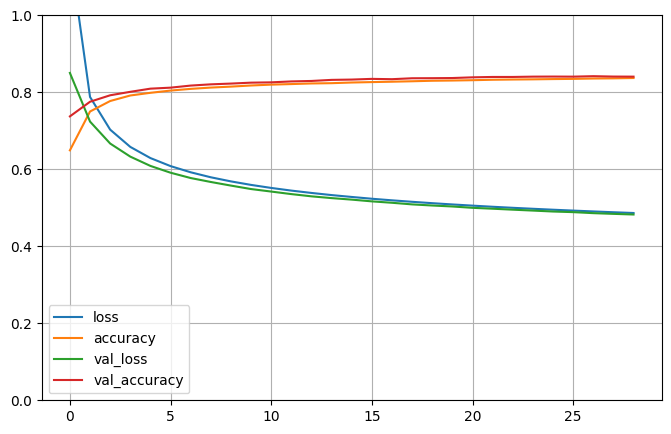

La precisión promedio del modelo es de 82.0 %
 
Evaluamos con el optimizador adadelta
Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3543 - accuracy: 0.1021 - val_loss: 2.2490 - val_accuracy: 0.1372
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 2.1587 - accuracy: 0.1865 - val_loss: 2.0766 - val_accuracy: 0.2298
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 2.0055 - accuracy: 0.2892 - val_loss: 1.9321 - val_accuracy: 0.3444
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 1.8675 - accuracy: 0.4019 - val_loss: 1.7961 - val_accuracy: 0.4566
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 1.7401 - accuracy: 0.4953 - val_loss: 1.6722 - val_accuracy: 0.5384
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6247 - accuracy: 0.5561 - val_loss: 1.5624 - val_accuracy: 0.5850
Epoch 7/100
1719/1719 [=====================

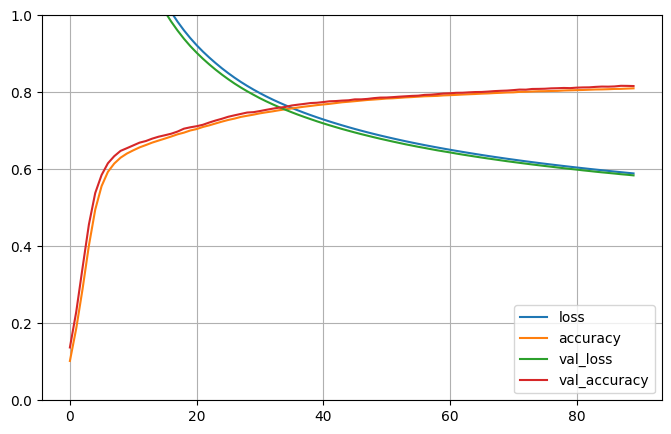

La precisión promedio del modelo es de 74.0 %
 
Evaluamos con el optimizador nadam
Epoch 1/100
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5245 - accuracy: 0.8203 - val_loss: 0.4160 - val_accuracy: 0.8568
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8600 - val_loss: 0.3799 - val_accuracy: 0.8684
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3571 - accuracy: 0.8727 - val_loss: 0.3507 - val_accuracy: 0.8730
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8801 - val_loss: 0.3360 - val_accuracy: 0.8800
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.8843 - val_loss: 0.3559 - val_accuracy: 0.8726
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.8885 - val_loss: 0.3254 - val_accuracy: 0.8836
Epoch 7/100
1719/1719 [========================

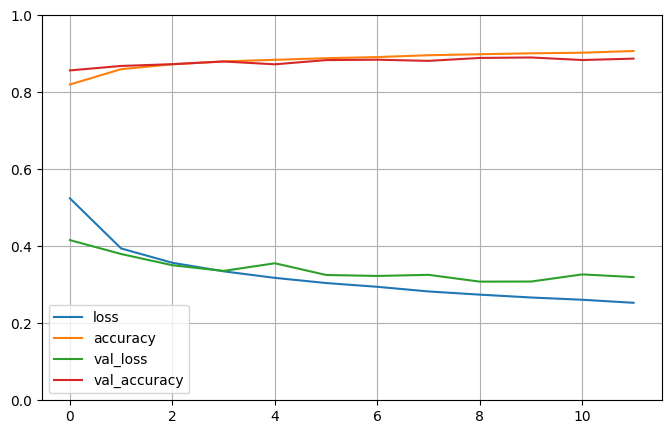

La precisión promedio del modelo es de 88.0 %


In [10]:
change_optimizer("adam")
change_optimizer("rmsprop")
change_optimizer("adagrad")
change_optimizer("adadelta")
change_optimizer("nadam")

En este caso, podemos ver que los los optimizadores Adam, RSMprop y Nadam tiene una clara mejoria respecto a los dos otros 2, en cuanto a epocas necesarias para llegar a un punto de convergencia, como por la precision del modelo. Esto se puede explicar debido a que los optimizadores con mejor rendimiento tienen tasas de aprendizaje adaptativas, lo que significa que ajustan automáticamente la tasa de aprendizaje para cada parámetro de la red neuronal en función de la magnitud del gradiente, además, usan momentum para acelerar la convergencia del modelo. El momentum ayuda a la red neuronal a superar los mínimos locales y a converger más rápidamente hacia el mínimo global

##### Apartado 12 - Regularización
- Para este apartado, vamos a evaluar 4 formas de regularización

1. Regularizacion L1 y L2: La regularización L1 y L2 añade una penalización a la función de pérdida. La regularización L1 agrega la suma de los valores absolutos de los pesos de la red, mientras que la regularización L2 agrega la suma de los cuadrados de los pesos. Ambas técnicas obligan a la red a utilizar pesos más pequeños, reduciendo así el riesgo de sobreajuste.

2. Dropout: La técnica de Dropout consiste en desactivar aleatoriamente un porcentaje de las neuronas de la red durante el entrenamiento. Esto ayuda a evitar que las neuronas se vuelvan dependientes de otras neuronas específicas y a reducir el sobreajuste

4. Batch Normalization: La técnica de Batch Normalization normaliza las entradas de cada capa de la red para tener una media de cero y una varianza de uno. Esto ayuda a reducir el impacto de los cambios en los pesos de una capa en la distribución de las entradas de la siguiente capa, lo que a su vez ayuda a reducir el sobreajuste.

In [14]:
def change_regula(model):
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd",
                metrics =["accuracy"])

    es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
    history = model.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    accuracy = round(np.average(history.history['val_accuracy']),2)
    print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

 
Regularizacion L1 y L2
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 4.2595 - accuracy: 0.6885 - val_loss: 1.4776 - val_accuracy: 0.7232
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3604 - accuracy: 0.7235 - val_loss: 1.2564 - val_accuracy: 0.7432
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2177 - accuracy: 0.7311 - val_loss: 1.1499 - val_accuracy: 0.7504
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1462 - accuracy: 0.7368 - val_loss: 1.1247 - val_accuracy: 0.7422
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1028 - accuracy: 0.7405 - val_loss: 1.0781 - val_accuracy: 0.7580
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0752 - accuracy: 0.7463 - val_loss: 1.0474 - val_accuracy: 0.7572
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0541 - accuracy: 0.7493 - 

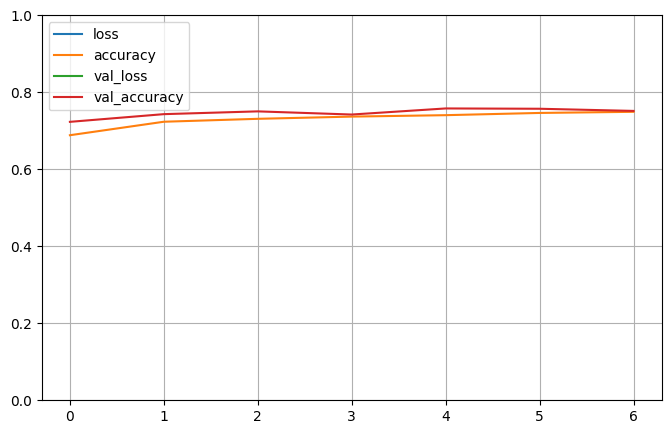

La precisión promedio del modelo es de 75.0 %


In [23]:
# Regularizacion L1 y L2
print(" ")
print("Regularizacion L1 y L2")
model_change_opt = keras.models.Sequential()
model_change_opt.add(keras.layers.Flatten(input_shape=[28,28]))
model_change_opt.add(keras.layers.Dense(50, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model_change_opt.add(keras.layers.Dense(10, activation="softmax"))

# Revisamos el modelo
change_regula(model_change_opt)


 
Regularizacion con la tecnica de Dropout
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9122 - accuracy: 0.6963 - val_loss: 0.5876 - val_accuracy: 0.8118
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6147 - accuracy: 0.7921 - val_loss: 0.5026 - val_accuracy: 0.8356
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5443 - accuracy: 0.8122 - val_loss: 0.4744 - val_accuracy: 0.8358
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5102 - accuracy: 0.8233 - val_loss: 0.4424 - val_accuracy: 0.8484
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4870 - accuracy: 0.8315 - val_loss: 0.4239 - val_accuracy: 0.8578
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4657 - accuracy: 0.8364 - val_loss: 0.4135 - val_accuracy: 0.8586
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4536 - a

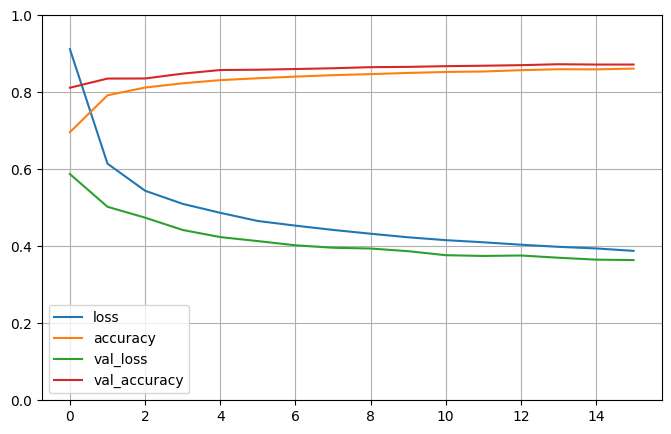

La precisión promedio del modelo es de 86.0 %


In [18]:
# Regularizacion Dropout
print(" ")
print("Regularizacion con la tecnica de Dropout")
model_change_opt = keras.models.Sequential()
model_change_opt.add(keras.layers.Flatten(input_shape=[28,28]))
model_change_opt.add(keras.layers.Dense(50, activation="relu"))
model_change_opt.add(keras.layers.Dropout(0.2))
model_change_opt.add(keras.layers.Dense(10, activation="softmax"))

# Revisamos el modelo
change_regula(model_change_opt)

 
Regularizacion con la tecnica de Batch Normalization
Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6990 - accuracy: 0.7735 - val_loss: 0.4885 - val_accuracy: 0.8330
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4897 - accuracy: 0.8328 - val_loss: 0.4209 - val_accuracy: 0.8554
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4427 - accuracy: 0.8478 - val_loss: 0.3955 - val_accuracy: 0.8642
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4147 - accuracy: 0.8563 - val_loss: 0.3773 - val_accuracy: 0.8676
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3997 - accuracy: 0.8597 - val_loss: 0.3733 - val_accuracy: 0.8688
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3831 - accuracy: 0.8659 - val_loss: 0.3763 - val_accuracy: 0.8646
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss

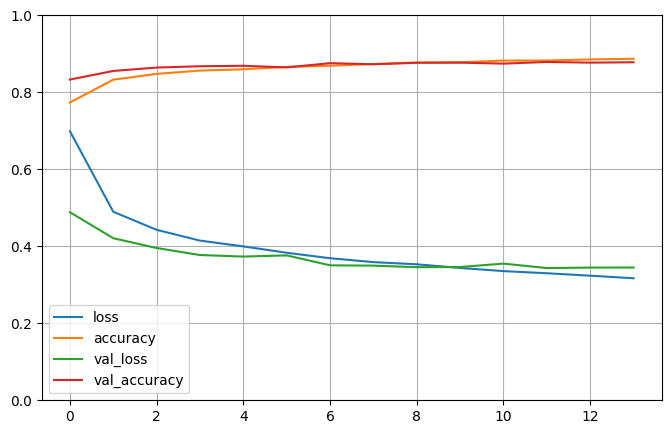

La precisión promedio del modelo es de 87.0 %


In [21]:
# Regularizacion con Batch Normalization
print(" ")
print("Regularizacion con la tecnica de Batch Normalization")
model_change_opt = keras.models.Sequential()
model_change_opt.add(keras.layers.Flatten(input_shape=[28,28]))
model_change_opt.add(keras.layers.Dense(50))
model_change_opt.add(keras.layers.BatchNormalization())
model_change_opt.add(keras.layers.Activation('relu'))
model_change_opt.add(keras.layers.Dense(10, activation="softmax"))

# Revisamos el modelo
change_regula(model_change_opt)

Para este apartado, vemos que la tecnica de regularizacion L1 y L2 empeoro el rendimiento del modelo base, esto se puede explicar ya que esta tecnica penaliza los parámetros de la red neuronal, lo que puede causar una pérdida de información importante en la red y/o overfitting, ademas, por la naturaleza de este modelo (con 1 sola capa intermedia) la regularización puede ser innecesaria ya que estos modelos no tienen suficientes parámetros para sobreajustarse a los datos de entrenamiento

Las otras tecnicas evaluadas no tuvieron un efecto grande o de mejoria respecto al modelo base

##### Apartado 12 - Red final
Teniendo en cuenta los resultados anteriores, se procedera a realizar un modelo final que tenga en cuenta todas las mejorias que se detectaron
Estas serán:
- Unidad de Activación: tanh
- Inicialización de parámetros: he_uniform
- Optimizador: nadam
- Tecnica de regularización: Dropout 

Epoch 1/100
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5087 - accuracy: 0.8211 - val_loss: 0.4019 - val_accuracy: 0.8590
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8644 - val_loss: 0.3705 - val_accuracy: 0.8702
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3461 - accuracy: 0.8762 - val_loss: 0.3380 - val_accuracy: 0.8786
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3253 - accuracy: 0.8829 - val_loss: 0.3359 - val_accuracy: 0.8780
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3094 - accuracy: 0.8866 - val_loss: 0.3213 - val_accuracy: 0.8848
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8917 - val_loss: 0.3237 - val_accuracy: 0.8844
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.8968 - val_loss: 0.3256 - val_ac

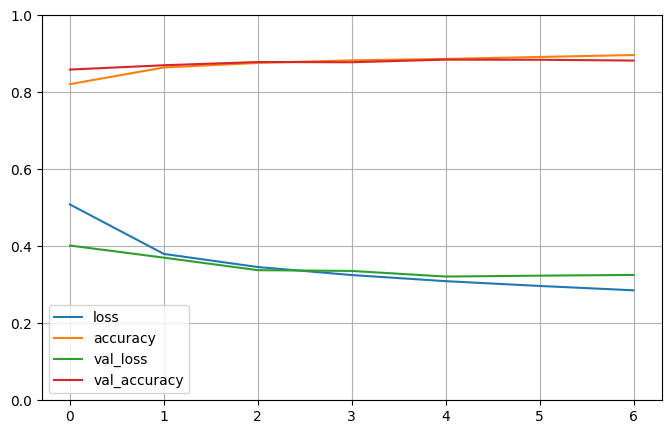

La precisión promedio del modelo es de 88.0 %


In [25]:
model_final = keras.models.Sequential()
model_final.add(keras.layers.Flatten(input_shape=[28,28]))
model_final.add(keras.layers.Dense(50, activation="tanh", kernel_initializer="he_uniform"))
model_change_opt.add(keras.layers.Dropout(0.2))
model_final.add(keras.layers.Dense(10, activation="softmax"))

# Compilamos el modelo
model_final.compile(loss="sparse_categorical_crossentropy",
              optimizer= "nadam",
              metrics =["accuracy"])

es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=2)
history = model_final.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
accuracy = round(np.average(history.history['val_accuracy']),2)
print('La precisión promedio del modelo es de',round(accuracy*100,2),'%')

Podemos ver que el modelo si mejoró su rendimiento en comparación con el modelo base antes planteado, esto se puede corroborar ya que la precisión promedio del modelo paso de 85% a 88% y el número de epocas necesarias para converger en punto paso de 13 a 7 epocas en total, confirmado que las anteriores tecnicas y cambios sí ayudan a que el modelo funcione mejor con los datos de entrada